In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SAMPATH\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
analyzer = SentimentIntensityAnalyzer()

In [31]:
import pandas as pd
import numpy as np

import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [32]:
Nifty= pd.read_csv('D:\\Data Science\\Capstone Project\\Niftyprediction\\NSE_Historical data.csv',index_col='Date',parse_dates=True)

In [33]:
Nifty.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-06-18,8113.700195,8186.899902,8101.799805,8174.600098,8174.600098,144800.0
2015-06-19,8201.150391,8250.799805,8195.650391,8224.950195,8224.950195,147100.0
2015-06-22,8259.299805,8369.450195,8257.400391,8353.099609,8353.099609,122700.0
2015-06-23,8377.450195,8398.450195,8334.950195,8381.549805,8381.549805,131700.0
2015-06-24,8399.400391,8421.349609,8338.900391,8360.849609,8360.849609,130100.0


In [34]:
Nifty.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-11,10094.099609,10112.049805,9885.049805,9902.000000,9902.000000,715500.0
2020-06-12,9544.950195,9996.049805,9544.349609,9972.900391,9972.900391,796300.0
2020-06-15,9919.349609,9943.349609,9726.349609,9813.700195,9813.700195,716100.0
2020-06-16,10014.799805,10046.150391,9728.500000,9914.000000,9914.000000,899900.0
2020-06-17,9876.700195,10003.599609,9833.799805,9881.150391,9881.150391,685400.0


In [35]:
Nifty.isna().sum()

Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

In [36]:
Nifty.dropna(inplace=True)

In [37]:
Nifty['2_SMA'] = Nifty['Close'].rolling(window=2).mean()
Nifty['5_SMA'] = Nifty['Close'].rolling(window=5).mean()

Nifty = Nifty[Nifty['5_SMA'].notna()]
Trade_Buy = []
Trade_Sell = []

for i in range(len(Nifty)-1):
    if ((Nifty['2_SMA'].values[i] < Nifty['5_SMA'].values[i]) & (Nifty['2_SMA'].values[i+1] > Nifty['5_SMA'].values[i+1])):
        print("Trade Call for {row} is Buy.".format(row=Nifty.index[i].date()))
        Trade_Buy.append(i)
    elif ((Nifty['2_SMA'].values[i] > Nifty['5_SMA'].values[i]) & (Nifty['2_SMA'].values[i+1] < Nifty['5_SMA'].values[i+1])):
        print("Trade Call for {row} is Sell.".format(row=Nifty.index[i].date()))
        Trade_Sell.append(i)

Trade Call for 2015-06-26 is Sell.
Trade Call for 2015-06-30 is Buy.
Trade Call for 2015-07-07 is Sell.
Trade Call for 2015-07-10 is Buy.
Trade Call for 2015-07-20 is Sell.
Trade Call for 2015-07-22 is Buy.
Trade Call for 2015-07-23 is Sell.
Trade Call for 2015-07-30 is Buy.
Trade Call for 2015-08-07 is Sell.
Trade Call for 2015-08-14 is Buy.
Trade Call for 2015-08-19 is Sell.
Trade Call for 2015-08-27 is Buy.
Trade Call for 2015-08-31 is Sell.
Trade Call for 2015-09-08 is Buy.
Trade Call for 2015-09-21 is Sell.
Trade Call for 2015-09-29 is Buy.
Trade Call for 2015-10-12 is Sell.
Trade Call for 2015-10-15 is Buy.
Trade Call for 2015-10-26 is Sell.
Trade Call for 2015-11-16 is Buy.
Trade Call for 2015-11-18 is Sell.
Trade Call for 2015-11-19 is Buy.
Trade Call for 2015-12-02 is Sell.
Trade Call for 2015-12-14 is Buy.
Trade Call for 2015-12-31 is Sell.
Trade Call for 2016-01-22 is Buy.
Trade Call for 2016-02-02 is Sell.
Trade Call for 2016-02-05 is Buy.
Trade Call for 2016-02-08 is Sell.

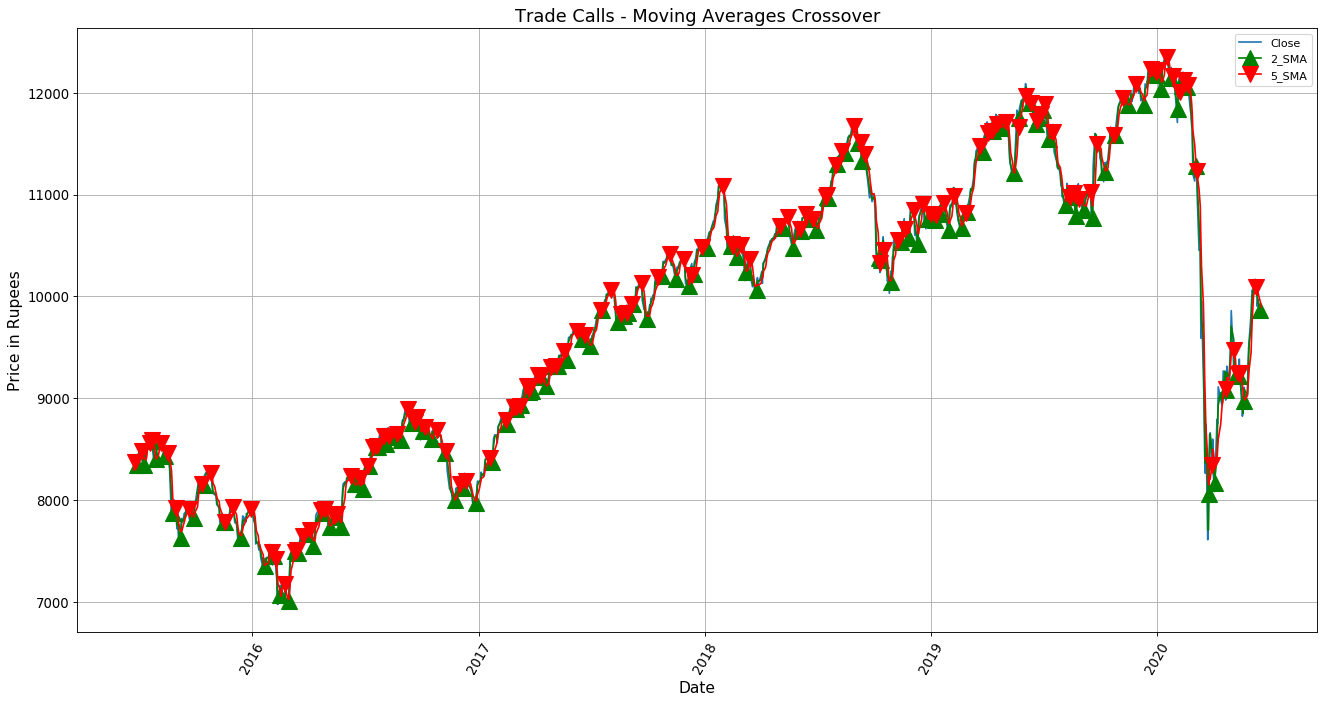

In [10]:
plt.figure(figsize=(20, 10),dpi=80)
plt.plot(Nifty.index, Nifty['Close'])
plt.plot(Nifty.index, Nifty['2_SMA'],'-^', markevery=Trade_Buy, ms=15, color='green')
plt.plot(Nifty.index, Nifty['5_SMA'],'-v', markevery=Trade_Sell, ms=15, color='red')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Rupees', fontsize = 14)
plt.xticks(rotation='60',fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - Moving Averages Crossover', fontsize = 16)
plt.legend(['Close','2_SMA','5_SMA'])
plt.grid()
plt.show()

In [38]:
import requests
url = 'https://newsapi.org/v2/everything?'

parameters = {
    'q': 'Nifty', # query phrase
    'sortBy': 'popularity', # articles from popular sources and publishers come first
    'pageSize': 100,  # maximum is 100 for developer version
    'apiKey': 'fa24af12041340f3bdfb50aebb28b22a', # your own API key
}

response = requests.get(url, params=parameters)

data = pd.DataFrame(response.json())


In [39]:
news_df = pd.concat([data['articles'].apply(pd.Series)], axis=1)

final_news = news_df.loc[:,['publishedAt','title']]
final_news['publishedAt'] = pd.to_datetime(final_news['publishedAt'])
final_news.sort_values(by='publishedAt',inplace=True)

In [40]:
from pandas.tseries.offsets import BDay

In [41]:
def get_trade_open(date):
    curr_date_open = pd.to_datetime(date).floor('d').replace(hour=9,minute=15) - BDay(0)
    curr_date_close = pd.to_datetime(date).floor('d').replace(hour=15,minute=30) - BDay(0)
    
    prev_date_close = (curr_date_open - BDay()).replace(hour=15,minute=30)
    next_date_open = (curr_date_close + BDay()).replace(hour=9,minute=15)
    
    if ((pd.to_datetime(date)>=prev_date_close) & (pd.to_datetime(date)<curr_date_open)):
        return curr_date_open
    elif ((pd.to_datetime(date)>=curr_date_close) & (pd.to_datetime(date)<next_date_open)):
        return next_date_open
    else:
        return None
    
final_news["trading_time"] = final_news["publishedAt"].apply(get_trade_open)

final_news = final_news[pd.notnull(final_news['trading_time'])]
final_news['Date'] = pd.to_datetime(pd.to_datetime(final_news['trading_time']).dt.date)

In [42]:
cs = []
for row in range(len(final_news)):
    cs.append(analyzer.polarity_scores(final_news['title'].iloc[row])['compound'])

final_news['compound_vader_score'] = cs
final_news = final_news[(final_news[['compound_vader_score']] != 0).all(axis=1)].reset_index(drop=True)

final_news.head()

,publishedAt,title,trading_time,Date,compound_vader_score
0,2020-06-22 20:14:52+00:00,Microsoft is killing its game-streaming servic...,2020-06-23 09:15:00+00:00,2020-06-23,-0.6597
1,2020-06-22 22:06:42+00:00,The four most exciting announcements from WWDC...,2020-06-23 09:15:00+00:00,2020-06-23,0.5413
2,2020-06-24 04:14:00+00:00,"Indian shares gain on boost from banks, Relian...",2020-06-24 09:15:00+00:00,2020-06-24,0.8074
3,2020-06-24 06:34:00+00:00,Indian shares rise as upbeat earnings lift sen...,2020-06-24 09:15:00+00:00,2020-06-24,0.2960
4,2020-06-24 09:00:02+00:00,How to improve the battery life on your OnePlu...,2020-06-24 09:15:00+00:00,2020-06-24,0.4404


In [43]:
unique_dates = final_news['Date'].unique()
grouped_dates = final_news.groupby(['Date'])
keys_dates = list(grouped_dates.groups.keys())

max_cs = []
min_cs = []

for key in grouped_dates.groups.keys():
    data = grouped_dates.get_group(key)
    if data["compound_vader_score"].max() > 0:
        max_cs.append(data["compound_vader_score"].max())
    elif data["compound_vader_score"].max() < 0:
        max_cs.append(0)
    
    if data["compound_vader_score"].min() < 0:
        min_cs.append(data["compound_vader_score"].min())
    elif data["compound_vader_score"].min() > 0:
        min_cs.append(0)
    
extreme_scores_dict = {'Date':keys_dates,'max_scores':max_cs,'min_scores':min_cs}
extreme_scores_df = pd.DataFrame(extreme_scores_dict)

In [44]:
final_scores = []
for i in range(len(extreme_scores_df)):
    final_scores.append(extreme_scores_df['max_scores'].values[i] + extreme_scores_df['min_scores'].values[i])

extreme_scores_df['final_scores'] = final_scores

extreme_scores_df.head()

,Date,max_scores,min_scores,final_scores
0,2020-06-23,0.5413,-0.6597,-0.1184
1,2020-06-24,0.8074,0.0000,0.8074
2,2020-06-25,0.5106,-0.1531,0.3575
3,2020-06-26,0.8074,-0.2263,0.5811
4,2020-06-29,0.6369,0.0000,0.6369


In [45]:
vader_Buy=[]
vader_Sell=[]
for i in range(len(extreme_scores_df)):
    if extreme_scores_df['final_scores'].values[i] > 0.20:
        print("Trade Call for {row} is Buy.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        vader_Buy.append(extreme_scores_df['Date'].iloc[i].date())
    elif extreme_scores_df['final_scores'].values[i] < -0.20:
        print("Trade Call for {row} is Sell.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        vader_Sell.append(extreme_scores_df['Date'].iloc[i].date())

Trade Call for 2020-06-24 is Buy.
Trade Call for 2020-06-25 is Buy.
Trade Call for 2020-06-26 is Buy.
Trade Call for 2020-06-29 is Buy.
Trade Call for 2020-06-30 is Buy.
Trade Call for 2020-07-01 is Buy.
Trade Call for 2020-07-02 is Buy.
Trade Call for 2020-07-03 is Buy.
Trade Call for 2020-07-06 is Buy.
Trade Call for 2020-07-07 is Buy.
Trade Call for 2020-07-08 is Buy.
Trade Call for 2020-07-10 is Sell.
Trade Call for 2020-07-13 is Buy.
Trade Call for 2020-07-14 is Sell.
Trade Call for 2020-07-15 is Buy.


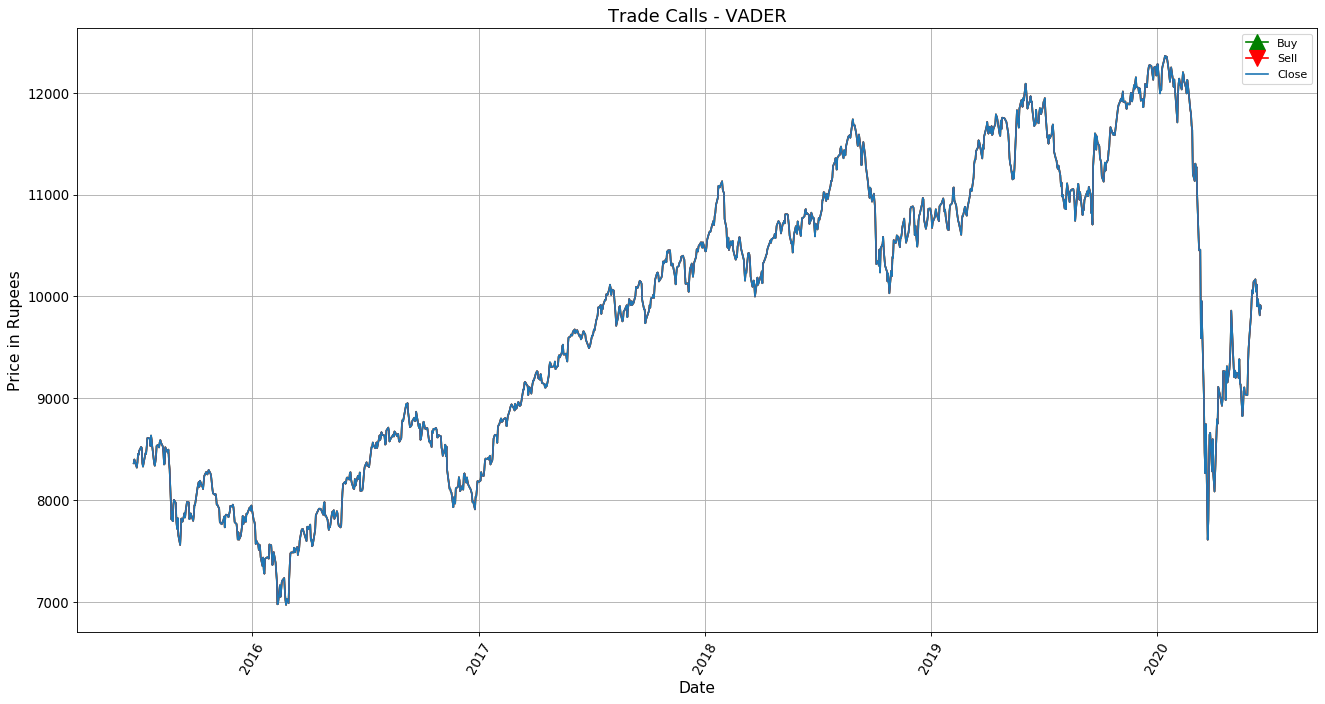

In [46]:
vader_buy = []
for i in range(len(Nifty)):
    if Nifty.index[i].date() in vader_Buy:
        vader_buy.append(i)
        
vader_sell = []
for i in range(len(Nifty)):
    if Nifty.index[i].date() in vader_Sell:
        vader_sell.append(i)
        
plt.figure(figsize=(20, 10),dpi=80)
plt.plot(Nifty.index, Nifty['Close'],'-^', markevery=vader_buy, ms=15, color='green')
plt.plot(Nifty.index, Nifty['Close'],'-v', markevery=vader_sell, ms=15, color='red')
plt.plot(Nifty.index, Nifty['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Rupees', fontsize = 14)
plt.xticks(rotation='60',fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - VADER', fontsize = 16)
plt.legend(['Buy','Sell','Close'])
plt.grid()
plt.show()

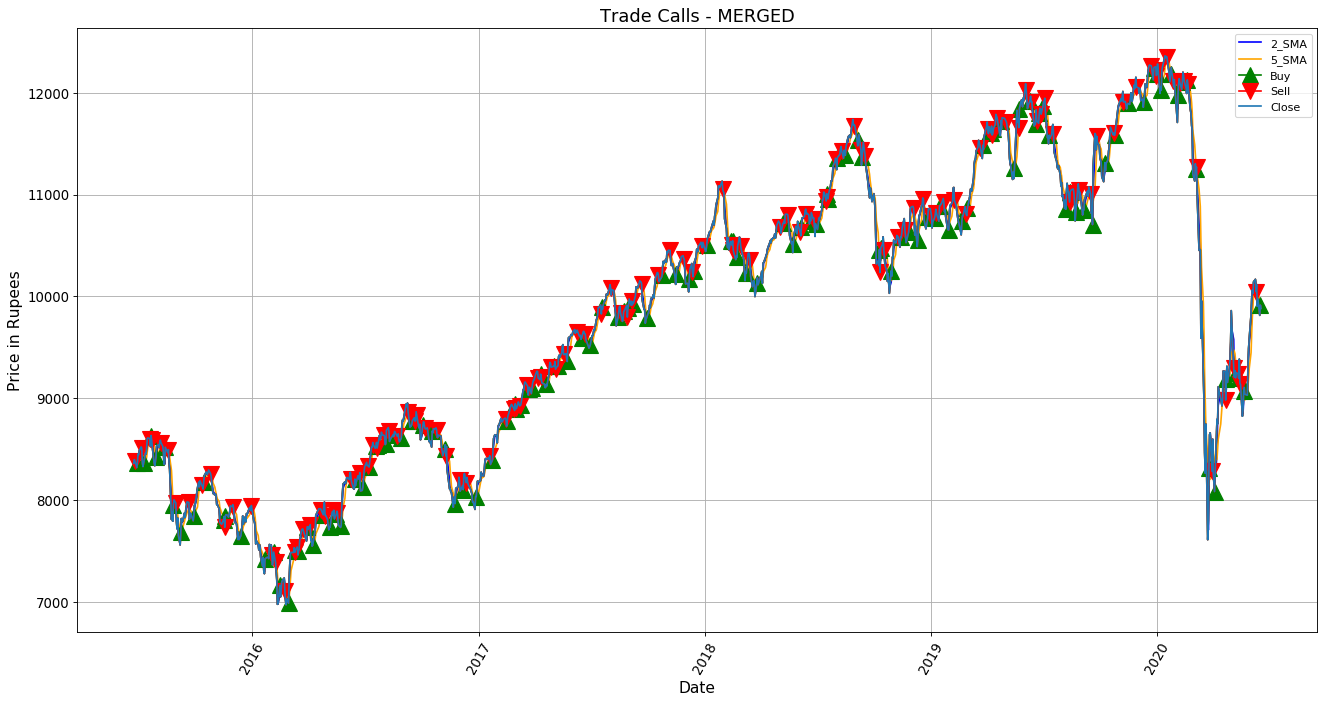

In [47]:
final_buy = list(set(Trade_Buy + vader_buy) - set(Trade_Sell)) 
final_sell = list(set(Trade_Sell + vader_sell) - set(Trade_Buy))

plt.figure(figsize=(20, 10),dpi=80)
plt.plot(Nifty.index, Nifty['2_SMA'], color='blue')
plt.plot(Nifty.index, Nifty['5_SMA'], color='orange')
plt.plot(Nifty.index, Nifty['Close'],'-^', markevery=final_buy, ms=15, color='green')
plt.plot(Nifty.index, Nifty['Close'],'-v', markevery=final_sell, ms=15, color='red')
plt.plot(Nifty.index, Nifty['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Rupees', fontsize = 14)
plt.xticks(rotation='60',fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - MERGED', fontsize = 16)
plt.legend(['2_SMA','5_SMA','Buy','Sell','Close'])
plt.grid()
plt.show() 

In [48]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores("VADER Sentiment looks interesting, I have high hopes!")
print(vs)

{'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'compound': 0.6996}


In [55]:
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [59]:
sentiment_analyzer_scores("covid medicine introduced by india.")

covid medicine introduced by india.----- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [60]:
import pickle
file = open('final_scores.pkl','wb')
pickle.dump(analyzer.polarity_scores, file)